# Exploratory Analysis of Arabic Wikipedia Editions:

## Misleading Human Involvement:

### List of Contributors:

#### Bots Arabic Wikipedia Editions:

In [1]:
import re, requests
from bs4 import BeautifulSoup

def get_arwikis_bots_list():
    bots = []
    for wiki in ['ar', 'arz', 'ary']:
        if wiki=='arz':
            url = f'https://{wiki}.wikipedia.org/wiki/خاص:عرض_اليوزرات?username=&group=bot&wpsubmit=&wpFormIdentifier=mw-listusers-form&limit=1000'
        else: 
            url = f'https://{wiki}.wikipedia.org/wiki/خاص:عرض_المستخدمين?username=&group=bot&wpsubmit=&wpFormIdentifier=mw-listusers-form&limit=1000'
        bots_list = re.findall("<" + "bdi" + ">(.*?)</" + "bdi" + ">", str(BeautifulSoup(requests.get(url).content, "html.parser")))
        bots = bots + bots_list
    return list(set(bots)) 
    
arwikis_bots_list = get_arwikis_bots_list()
print(f"## Found {len(arwikis_bots_list)} Bots in {{AR, ARZ, ARY}} WIKIs")

## Found 54 Bots in {AR, ARZ, ARY} WIKIs


#### Moroccan Arabic Wikipedia:

In [2]:
import pandas as pd

arywiki = pd.read_csv('../Wikipedia-20240101/arywiki-20240101/arywiki-20240101-pages-articles-multistream.csv')

arywiki_ordered = arywiki.sort_values(by='timestamp')

arywiki.head(3)

,No.,page_title,creation_date,creator_name,total_edits,total_editors,top_editors,total_bytes,total_chars,total_words,page_text,timestamp
0,1,أبطيح,2020-02-28,Tifratin,30,9,"['DarijaBot', 'MenoBot', 'Anass Sedrati', 'Ide...",1408,483,91,أبطيح جماعة ترابية قروية كاينة إقليم طانطان جه...,2023-10-22T10:47:45Z
1,2,أسفي,2020-01-27,Rachidourkia,38,10,"['DarijaBot', 'MenoBot', 'Ideophagous', 'Anass...",1970,633,114,آسفي بالأمازيغية ⴰⵙⴼⵉ هي مدينة مغربية جات إقلي...,2023-10-22T10:53:20Z
2,3,آلبرخت دورر,2019-10-10,SADIQUI,73,13,"['DarijaBot', 'SADIQUI', 'Ideophagous', 'MenoB...",5481,1458,228,آلبرخت دورر بالألمانية albrecht dürer ماي أبري...,2023-10-24T18:27:06Z


In [3]:
arywiki_creators = arywiki['creator_name'].value_counts()
arywiki_creators = dict(arywiki_creators)

list(arywiki_creators.items())[:5]

[('DarijaBot', 1507),
 ('Tifratin', 1289),
 ('Ideophagous', 898),
 ('Anass Sedrati', 765),
 ('Rachidourkia', 538)]

In [4]:
arywiki_bots = {}
arywiki_humans = {}

for creator, count in arywiki_creators.items():
    if creator in arwikis_bots_list or 'bot' in creator.lower():
        arywiki_bots[creator] = count
    else: arywiki_humans[creator] = count

len(arywiki_humans), len(arywiki_bots), 

(226, 2)

In [5]:
total_arywiki_humans = sum(list(arywiki_humans.values()))
total_arywiki_bots = sum(list(arywiki_bots.values()))

total_arywiki_humans, total_arywiki_bots,

(5244, 1509)

#### Egyptian Arabic Wikipedia:

In [6]:
import pandas as pd

arzwiki = pd.read_csv('../Wikipedia-20240101/arzwiki-20240101/arzwiki-20240101-pages-articles-multistream.csv')

arzwiki_ordered = arzwiki.sort_values(by='timestamp')

arzwiki.head(3)

,No.,page_title,creation_date,creator_name,total_edits,total_editors,top_editors,total_bytes,total_chars,total_words,page_text,timestamp
0,1,جنوب السودان,2008-09-03,imported&gt;FadyWalker,252,58,"['Luckas-bot', 'Ghaly', 'imported&gt;FadyWalke...",10601,3826,628,علم جنوب السودان جنوب السودان هيا دولة مستقلة ...,2023-10-29T09:42:46Z
1,2,الاهرامات المصريه,2008-04-23,Ghaly,135,63,"['Ghaly', 'Raafat', 'GhalyBot', 'MenoBot', 'Sa...",11244,1474,249,الاهرامات الجيزه من الهضبه الجنوبيه للمجمع من ...,2023-10-01T16:49:14Z
2,3,اندريه اجاسى,2008-09-29,Ghaly,123,33,"['Ghaly', 'GhalyBot', 'MenoBot', 'Ramsis II', ...",13729,1197,195,اندريه كيرك اجاسى هو لاعب تنس محترف معتزل من ا...,2023-11-24T08:56:13Z


In [7]:
arzwiki_creators = arzwiki['creator_name'].value_counts()
arzwiki_creators = dict(arzwiki_creators)

list(arzwiki_creators.items())[:5]

[('HitomiAkane', 692850),
 ('Al-Dandoon', 15491),
 ('Raafat', 11007),
 ('Ghaly', 3830),
 ('حمدى10', 2026)]

In [8]:
arzwiki_bots = {}
arzwiki_humans = {}

for creator, count in arzwiki_creators.items():
    if creator in arwikis_bots_list or 'bot' in creator.lower():
        arzwiki_bots[creator] = count
    else: arzwiki_humans[creator] = count

len(arzwiki_humans), len(arzwiki_bots),

(1268, 3)

In [9]:
total_arzwiki_humans = sum(list(arzwiki_humans.values()))
total_arzwiki_bots = sum(list(arzwiki_bots.values()))

total_arzwiki_humans, total_arzwiki_bots,

(736103, 4)

#### Arabic Wikipedia:

In [10]:
import warnings
import pandas as pd
warnings.filterwarnings("ignore")

arwiki = pd.read_csv('../Wikipedia-20240101/arwiki-20240101/arwiki-20240101-pages-articles-multistream.csv', delimiter="◆◆◆")

arwiki_ordered = arwiki.sort_values(by='timestamp')

arwiki.head(3)

,No.,page_title,creation_date,creator_name,total_edits,total_editors,top_editors,total_bytes,total_chars,total_words,page_text,timestamp
0,1,ماء,2003-07-11,Piolinfax,1782,675,"['Sami Lab', 'باسم', 'JarBot', 'Meno25', 'Ghan...",170088,49198,8831,ملف drop impact jpg يسار تصغير بك الماء هو الم...,2023-12-18T21:39:28Z
1,2,رياضيات,2003-08-03,Stevertigo,1465,509,"['Mohammad Abdullah', 'Chaos', 'JarBot', 'Ciph...",120498,28982,4800,الر اض ات هي مجموعة من المعارف المجردة الناتجة...,2023-12-20T12:35:24Z
2,3,إستونيا,2003-09-09,12.237.43.198,852,276,"['JarBot', '37.236.251.153', 'MenoBot', 'Omar ...",187830,54231,8986,إستونيا رسمي جمهورية إستونيا هي دولة تقع في من...,2023-10-19T00:32:21Z


In [11]:
arwiki_creators = arwiki['creator_name'].value_counts()
arwiki_creators = dict(arwiki_creators)

list(arwiki_creators.items())[:5]

[('JarBot', 243583),
 ('جار الله', 35925),
 ('Mr. Ibrahem', 32720),
 ('Majed', 24740),
 ('ElphiBot', 15495)]

In [12]:
arwiki_bots = {}
arwiki_humans = {}

for creator, count in arwiki_creators.items():
    if creator in arwikis_bots_list or 'bot' in creator.lower():
        arwiki_bots[creator] = count
    else: arwiki_humans[creator] = count

len(arwiki_humans), len(arwiki_bots), 

(51272, 50)

In [13]:
total_arwiki_humans = sum(list(arwiki_humans.values()))
total_arwiki_bots = sum(list(arwiki_bots.values()))

total_arwiki_humans, total_arwiki_bots,

(602727, 277178)

#### All Type of Contributors:

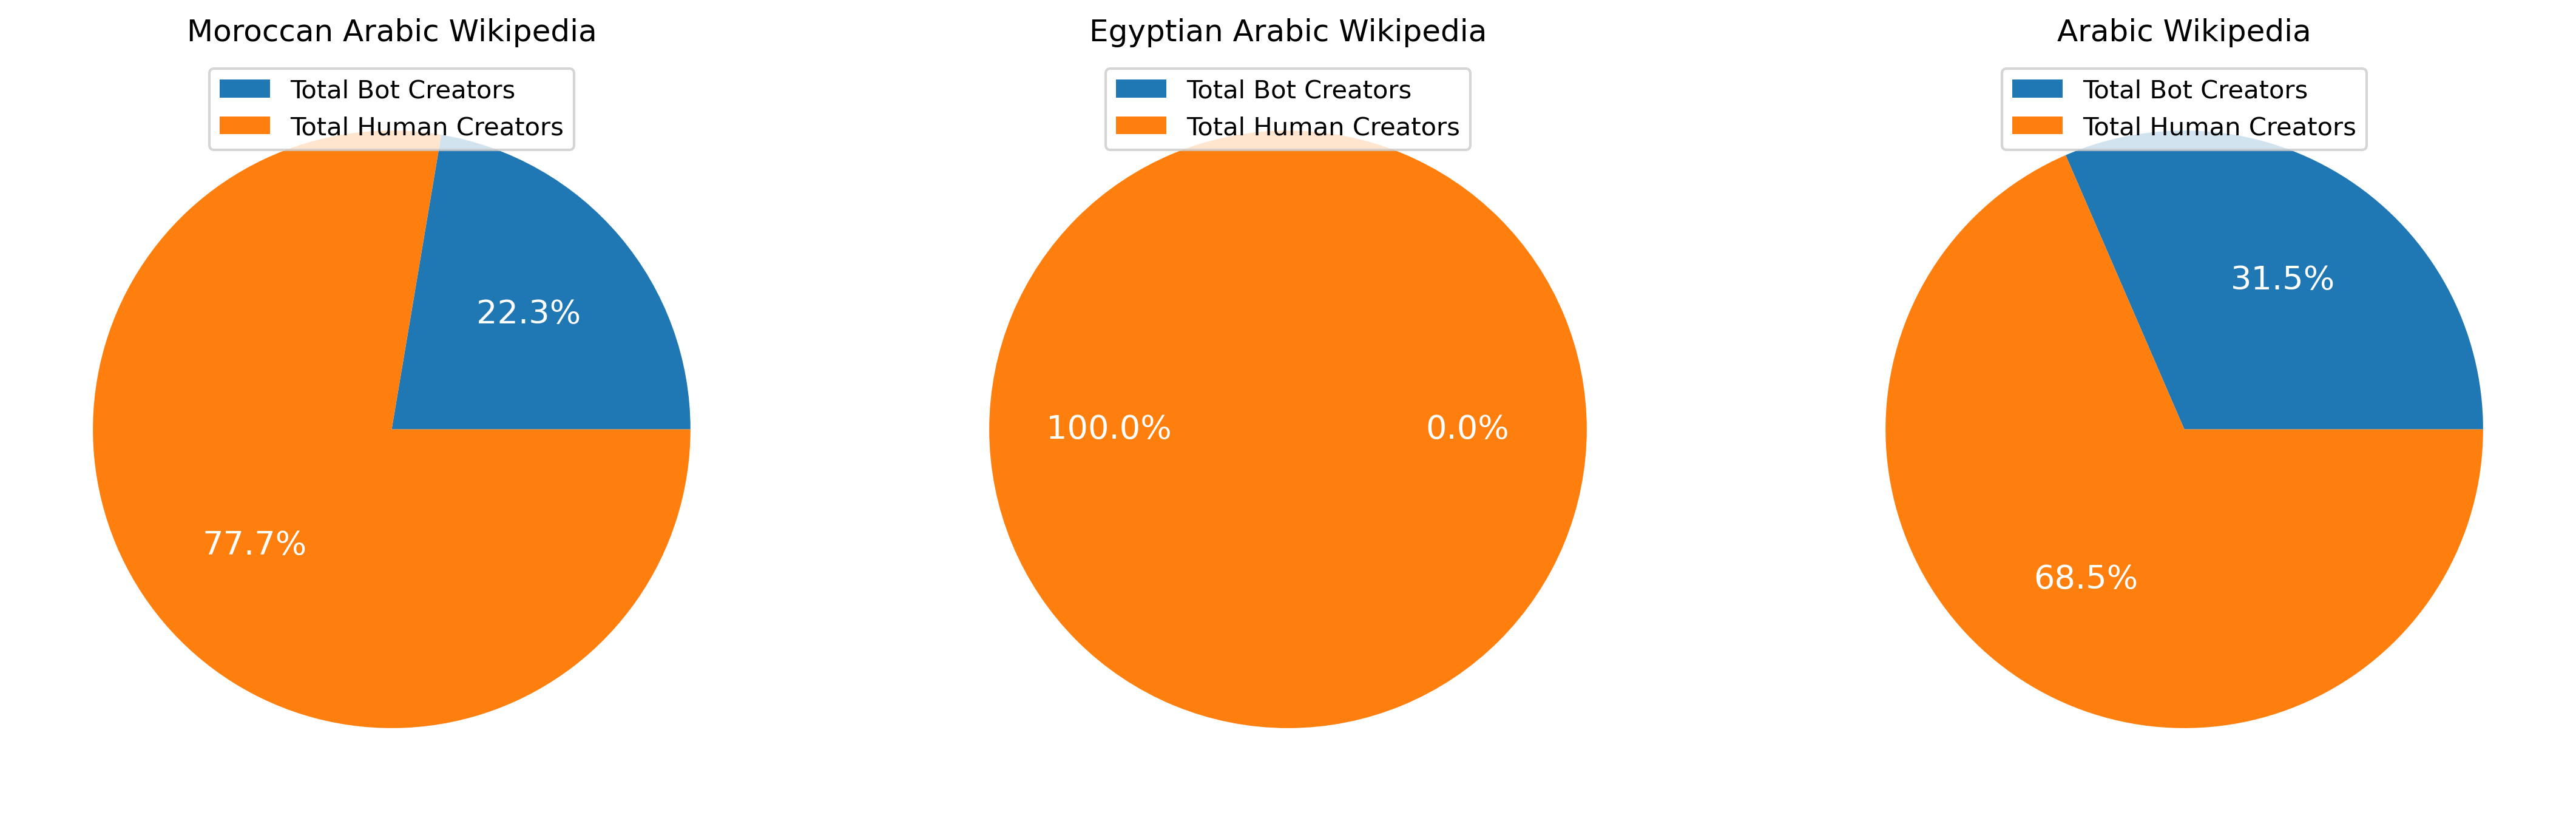

In [14]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

figure(figsize=(18, 12), dpi=300)
labels = 'Total Bot Creators', 'Total Human Creators'

plt.subplot(1, 3, 1)
plt.title("Moroccan Arabic Wikipedia")
arywiki_type_of_contributors = [total_arywiki_bots, total_arywiki_humans]
plt.pie(arywiki_type_of_contributors, autopct='%1.1f%%', textprops={'color':"w", 'fontsize': 13})
plt.legend(labels, loc="upper center")

plt.subplot(1, 3, 2)
plt.title("Egyptian Arabic Wikipedia")
arzwiki_type_of_contributors = [total_arzwiki_bots, total_arzwiki_humans]
plt.pie(arzwiki_type_of_contributors, autopct='%1.1f%%', textprops={'color':"w", 'fontsize': 13})
plt.legend(labels, loc="upper center")

plt.subplot(1, 3, 3)
plt.title("Arabic Wikipedia")
arwiki_type_of_contributors = [total_arwiki_bots, total_arwiki_humans]
plt.pie(arwiki_type_of_contributors, autopct='%1.1f%%', textprops={'color':"w", 'fontsize': 13})
plt.legend(labels, loc="upper center")

plt.savefig('charts/All-Type--of-Creators.png', bbox_inches='tight')
plt.show()

### Type of Contributors:

In [15]:
def quantify_bots_humans_edits(top_editors, arwikis_bots_list):    
    n_bots = 0
    top_editors = top_editors.replace("[","").replace("]","").replace("'","").replace(" ", "").split(",")
    for editor in top_editors:
        if editor in arwikis_bots_list or 'Bot' in  editor: n_bots += 1
    return (round(n_bots/len(top_editors)*100, 2)), (100-(round(n_bots/len(top_editors)*100, 2)))

#### Moroccan Arabic Wikipedia:

In [16]:
arywiki_ordered['bots_editors_%'] = arywiki_ordered['top_editors'].apply(lambda top_editors: quantify_bots_humans_edits(top_editors, arwikis_bots_list)[0])
arywiki_ordered['humans_editors_%'] = arywiki_ordered['top_editors'].apply(lambda top_editors: quantify_bots_humans_edits(top_editors, arwikis_bots_list)[1])

arywiki_ordered['editors_type'] = ['human' if x >= 50 else 'bot' for x in arywiki_ordered['humans_editors_%']]

arywiki_ordered_type_of_editors = arywiki_ordered[['No.', 'page_title', 'creation_date', 'creator_name', 'total_edits', 'total_editors', 'top_editors', 'editors_type', 'bots_editors_%', 'humans_editors_%', 'total_bytes', 'total_chars', 'total_words', 'page_text', 'timestamp']]

arywiki_ordered_type_of_editors.head(3)

,No.,page_title,creation_date,creator_name,total_edits,total_editors,top_editors,editors_type,bots_editors_%,humans_editors_%,total_bytes,total_chars,total_words,page_text,timestamp
2729,2730,زمان النية (رواية),2020-11-22,AyoubBouamriMa,11,5,"['DarijaBot', 'MenoBot', 'AyoubBouamriMa', 'PG...",bot,60.0,40.0,1245,474,78,زمان النية هي رواية كتباتها لميريكانية إيديث و...,2021-08-22T21:03:01Z
3695,3696,وليلي (توضيح),2021-09-06,Ideophagous,3,2,"['Ideophagous', 'Reda benkhadra']",human,0.0,100.0,703,314,54,هادي صفحة التوضيح كلمة وليلي يمكن يكونو عندها ...,2021-09-06T22:56:47Z
2415,2416,أودري آزولاي,2020-09-23,Reda benkhadra,15,4,"['DarijaBot', 'MenoBot', 'Reda benkhadra', 'Ab...",human,50.0,50.0,1014,385,67,أودري آزولاي لفرانساوية audrey azoulay تولدات ...,2021-09-28T22:59:00Z


In [17]:
arywiki_bots_editors = arywiki_ordered_type_of_editors.query('editors_type == "bot"').shape[0]
arywiki_humans_editors = arywiki_ordered_type_of_editors.query('editors_type == "human"').shape[0]
arywiki_bots_editors, arywiki_humans_editors

(2733, 4020)

#### Egyptian Arabic Wikipedia:

In [18]:
arzwiki_ordered['bots_editors_%'] = arzwiki_ordered['top_editors'].apply(lambda top_editors: quantify_bots_humans_edits(top_editors, arwikis_bots_list)[0])
arzwiki_ordered['humans_editors_%'] = arzwiki_ordered['top_editors'].apply(lambda top_editors: quantify_bots_humans_edits(top_editors, arwikis_bots_list)[1])

arzwiki_ordered['editors_type'] = ['human' if x >= 50 else 'bot' for x in arzwiki_ordered['humans_editors_%']]

arzwiki_ordered_type_of_editors = arzwiki_ordered[['No.', 'page_title', 'creation_date', 'creator_name', 'total_edits', 'total_editors', 'top_editors', 'editors_type', 'bots_editors_%', 'humans_editors_%', 'total_bytes', 'total_chars', 'total_words', 'page_text', 'timestamp']]

arzwiki_ordered_type_of_editors.head(3)

,No.,page_title,creation_date,creator_name,total_edits,total_editors,top_editors,editors_type,bots_editors_%,humans_editors_%,total_bytes,total_chars,total_words,page_text,timestamp
2586,2587,فيرديناند فون فرانجل,2009-09-21,Ramsis II,17,12,"['Xqbot', 'ZéroBot', 'Luckas-bot', 'Ramsis II'...",bot,58.33,41.67,1332,583,97,الادميرال فون فرانجل فيرديناند فون ڤرانجل بالر...,2015-07-03T12:51:15Z
7935,7936,اسماك نهر النيل,2013-08-29,Raafat,5,3,"['Raafat', 'M777', 'MenoBot']",human,33.33,66.67,4382,797,109,سمك القرموط catfish sharp tooth siluriformes س...,2015-07-29T13:04:26Z
1419,1420,الفوازير,2009-03-15,41.233.24.47,7,5,"['GhalyBot', '41.254.2.93', '41.233.24.47', 'M...",human,20.00,80.00,703,357,60,الفوازير او فوازير رمضان حلقات تليفزيونيه استع...,2015-07-29T15:01:56Z


In [19]:
arzwiki_bots_editors = arzwiki_ordered_type_of_editors.query('editors_type == "bot"').shape[0]
arzwiki_humans_editors = arzwiki_ordered_type_of_editors.query('editors_type == "human"').shape[0]
arzwiki_bots_editors, arzwiki_humans_editors

(471515, 264592)

#### Arabic Wikipedia:

In [20]:
arwiki_ordered['bots_editors_%'] = arwiki_ordered['top_editors'].apply(lambda top_editors: quantify_bots_humans_edits(top_editors, arwikis_bots_list)[0])
arwiki_ordered['humans_editors_%'] = arwiki_ordered['top_editors'].apply(lambda top_editors: quantify_bots_humans_edits(top_editors, arwikis_bots_list)[1])

arwiki_ordered['editors_type'] = ['human' if x >= 50 else 'bot' for x in arwiki_ordered['humans_editors_%']]

arwiki_ordered_type_of_editors = arwiki_ordered[['No.', 'page_title', 'creation_date', 'creator_name', 'total_edits', 'total_editors', 'top_editors', 'editors_type', 'bots_editors_%', 'humans_editors_%', 'total_bytes', 'total_chars', 'total_words', 'page_text', 'timestamp']]

arwiki_ordered_type_of_editors.head(3)

,No.,page_title,creation_date,creator_name,total_edits,total_editors,top_editors,editors_type,bots_editors_%,humans_editors_%,total_bytes,total_chars,total_words,page_text,timestamp
19930,19933,عبد السلام (توضيح),2007-02-22,جيسيكا,17,11,"['Abrar47', 'جيسيكا', 'CipherBot', 'Hatem Mous...",human,27.27,72.73,3481,1721,299,هل تقصد عبد السلام بن مشيش أحد أعلام التصوف عب...,2014-07-26T11:28:54Z
103036,103043,وا إسلاماه (توضيح),2011-01-11,خلدون شنتوت,4,3,"['خلدون شنتوت', 'Zaher.Kadour', 'Aiman titiBot']",human,33.33,66.67,937,454,71,وا إسلاماه رواية للأديب الراحل علي أحمد باكثير...,2014-10-13T16:18:33Z
237327,237402,جزيرة سميث (توضيح),2015-05-02,Shaween,13,5,"['Shaween', 'محمد نصار 1', 'SHBot', 'حساب ملغى...",human,40.00,60.00,1621,759,123,جزيرة سميث قد تشير إلى أسيا جزيرة سميث هي واحد...,2015-06-23T19:13:23Z


In [21]:
arwiki_bots_editors = arwiki_ordered_type_of_editors.query('editors_type == "bot"').shape[0]
arwiki_humans_editors = arwiki_ordered_type_of_editors.query('editors_type == "human"').shape[0]
arwiki_bots_editors, arwiki_humans_editors

(647832, 232073)

### All Type of Editors:

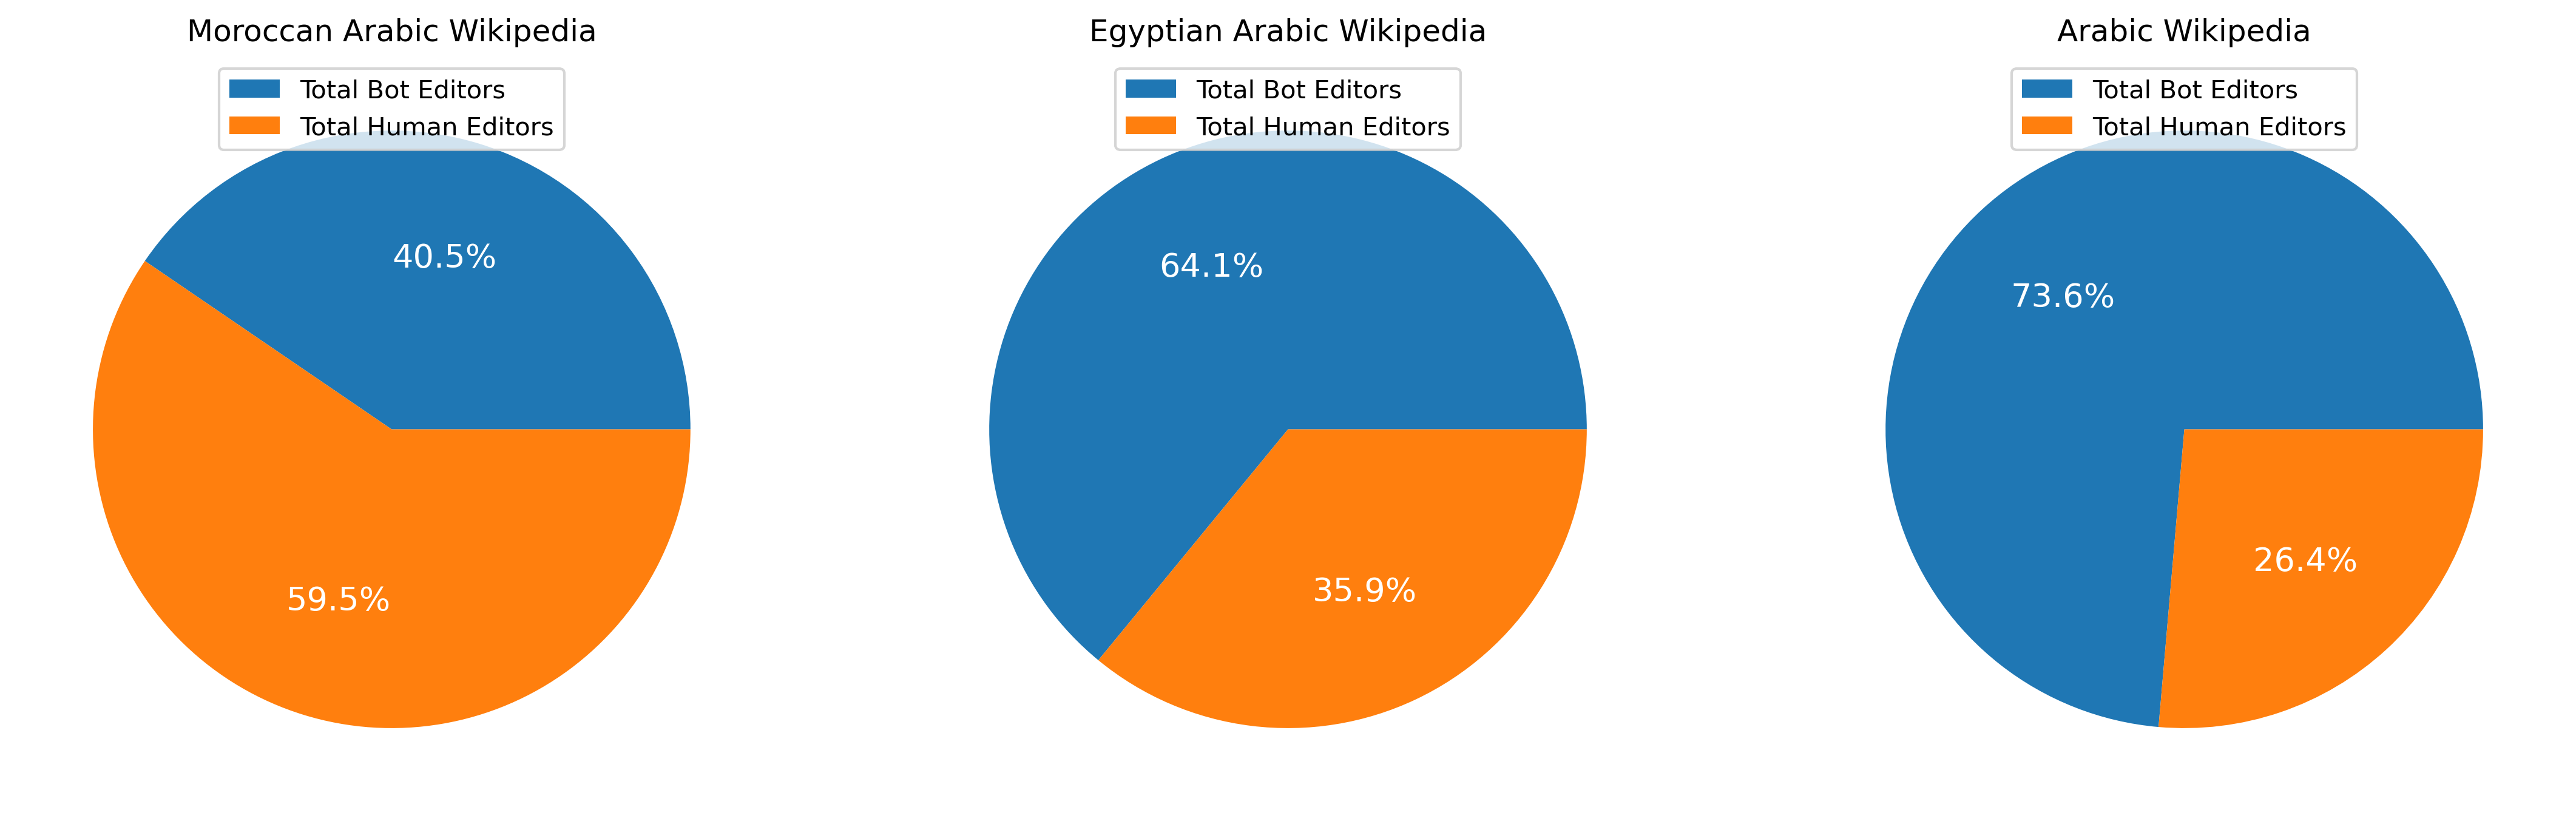

In [22]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

figure(figsize=(18, 12), dpi=300)
labels = 'Total Bot Editors', 'Total Human Editors'

plt.subplot(1, 3, 1)
plt.title("Moroccan Arabic Wikipedia")
arywiki_type_of_editors = [arywiki_bots_editors, arywiki_humans_editors]
plt.pie(arywiki_type_of_editors, autopct='%1.1f%%', textprops={'color':"w", 'fontsize': 13})
plt.legend(labels, loc="upper center")

plt.subplot(1, 3, 2)
plt.title("Egyptian Arabic Wikipedia")
arzwiki_type_of_editors = [arzwiki_bots_editors, arzwiki_humans_editors]
plt.pie(arzwiki_type_of_editors, autopct='%1.1f%%', textprops={'color':"w", 'fontsize': 13})
plt.legend(labels, loc="upper center")

plt.subplot(1, 3, 3)
plt.title("Arabic Wikipedia")
arwiki_type_of_editors = [arwiki_bots_editors, arwiki_humans_editors]

plt.pie(arwiki_type_of_editors, autopct='%1.1f%%', textprops={'color':"w", 'fontsize': 13})
plt.legend(labels, loc="upper center")

plt.savefig('charts/All-Type--of-Editors.png', bbox_inches='tight')
plt.show()

### All Pies Together:

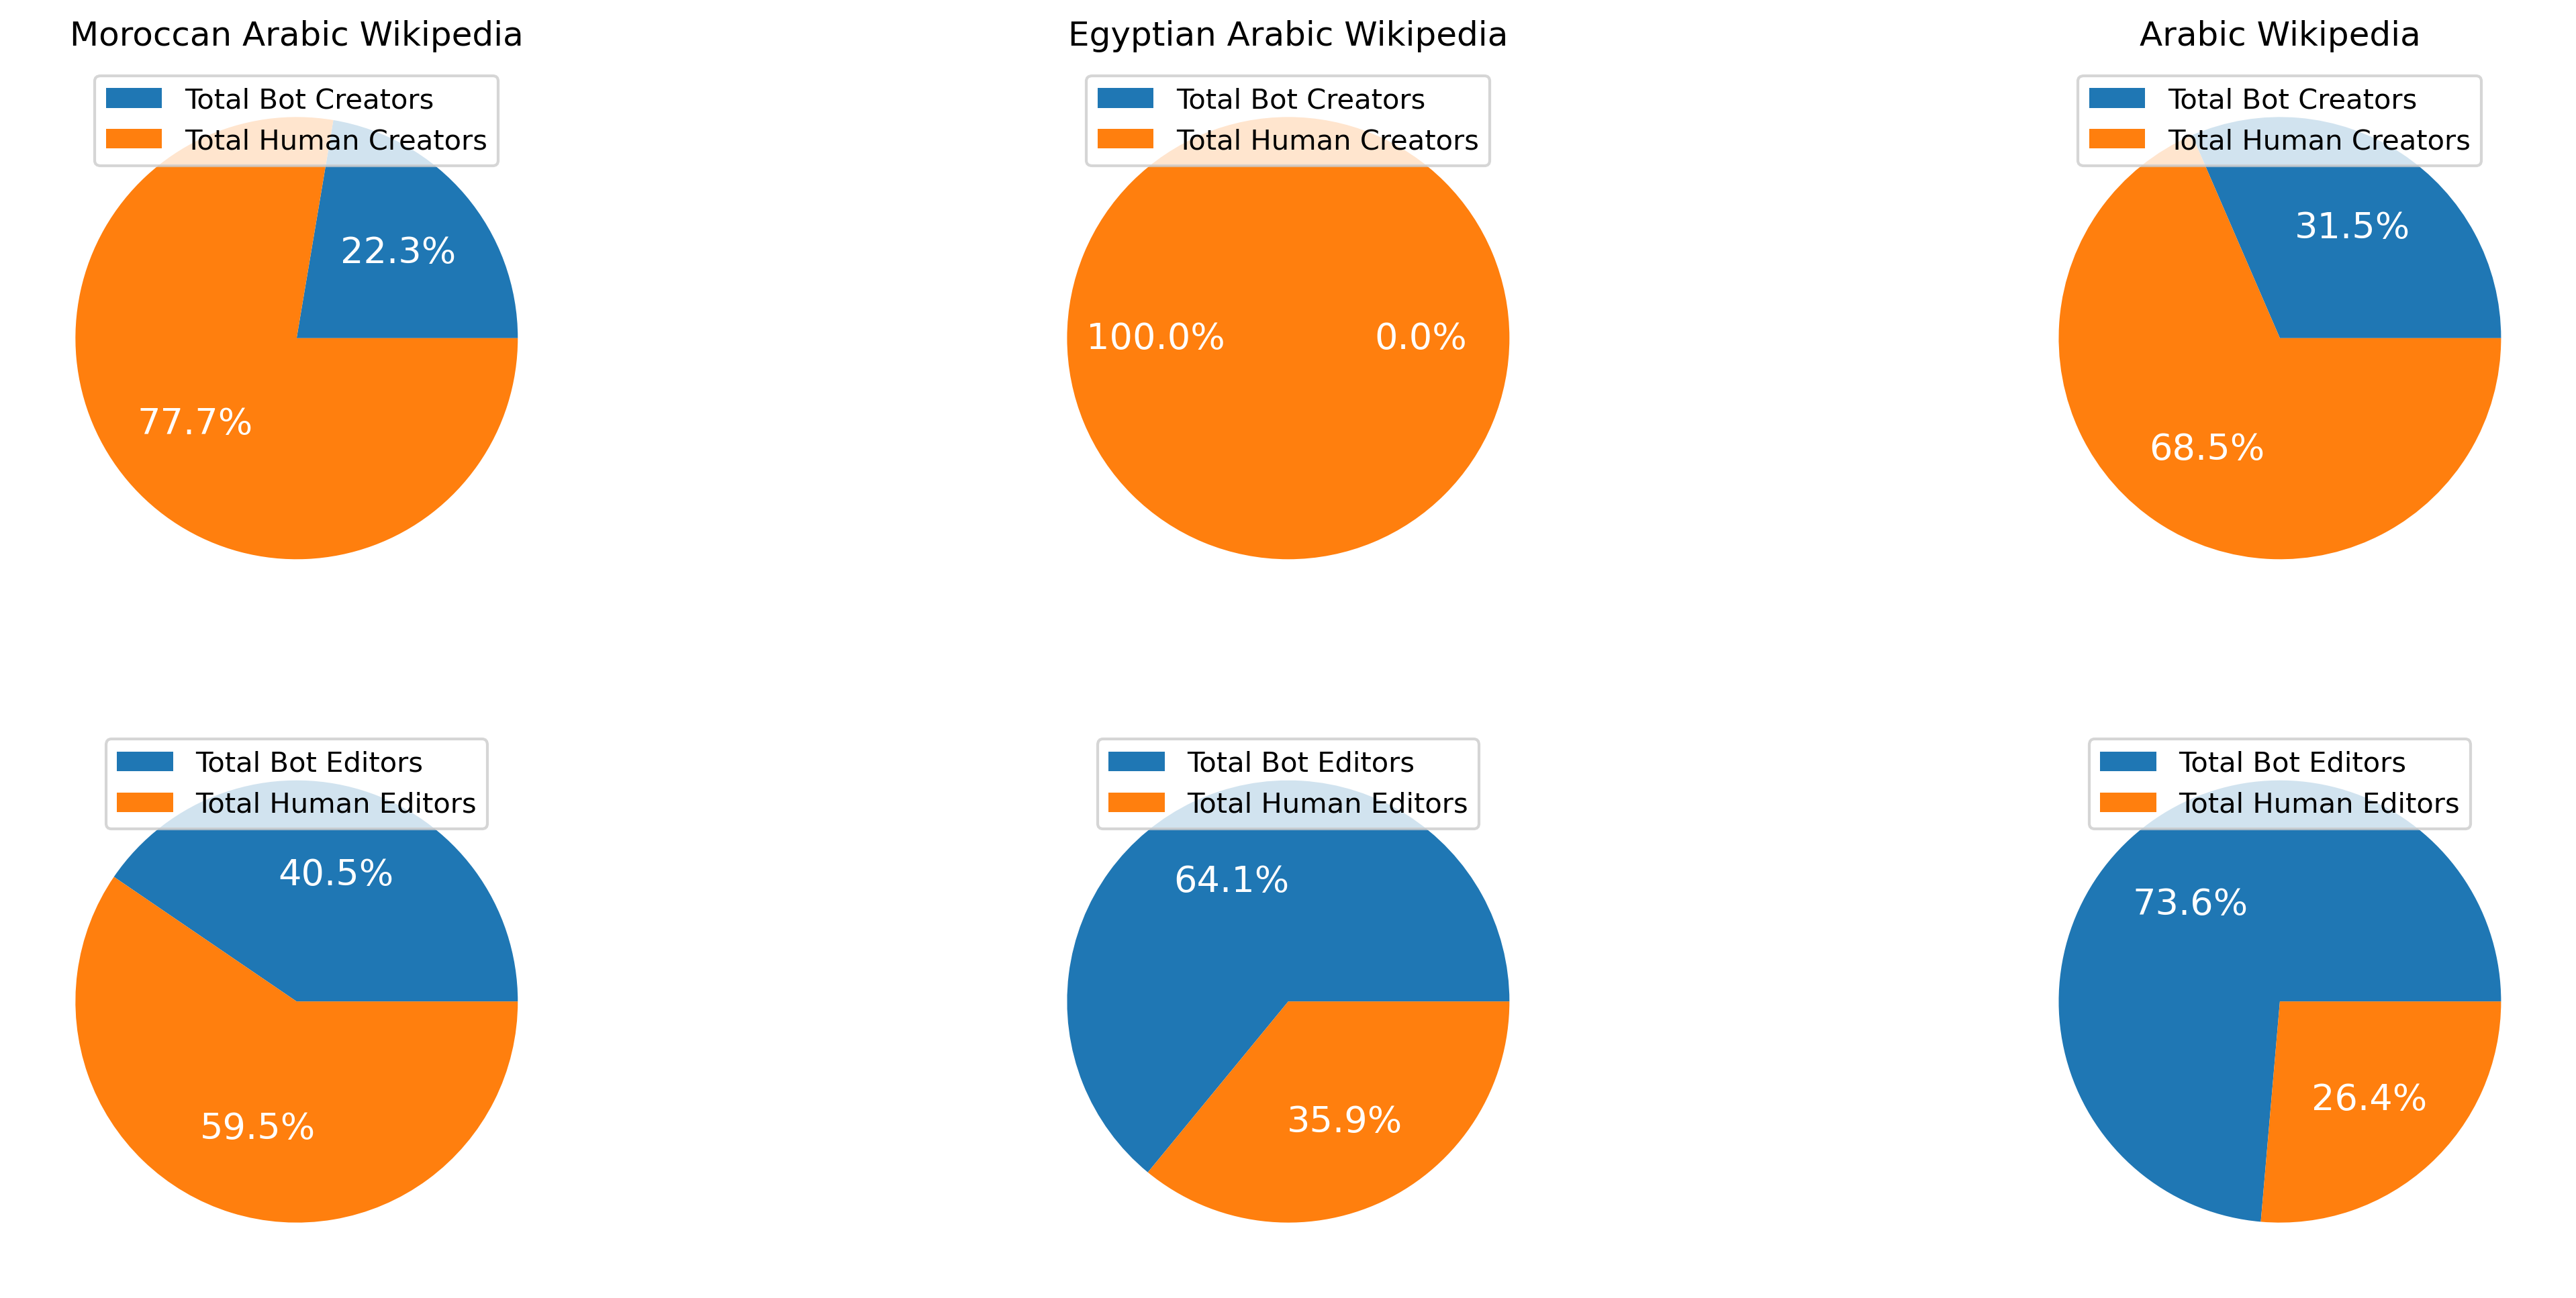

In [23]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

figure(figsize=(18, 8), dpi=300)
labels = 'Total Bot Creators', 'Total Human Creators'

plt.subplot(2, 3, 1)
plt.title("Moroccan Arabic Wikipedia")
arywiki_type_of_contributors = [total_arywiki_bots, total_arywiki_humans]
plt.pie(arywiki_type_of_contributors, autopct='%1.1f%%', textprops={'color':"w", 'fontsize': 13})
plt.legend(labels, loc="upper center")

plt.subplot(2, 3, 2)
plt.title("Egyptian Arabic Wikipedia")
arzwiki_type_of_contributors = [total_arzwiki_bots, total_arzwiki_humans]
plt.pie(arzwiki_type_of_contributors, autopct='%1.1f%%', textprops={'color':"w", 'fontsize': 13})
plt.legend(labels, loc="upper center")

plt.subplot(2, 3, 3)
plt.title("Arabic Wikipedia")
arwiki_type_of_contributors = [total_arwiki_bots, total_arwiki_humans]
plt.pie(arwiki_type_of_contributors, autopct='%1.1f%%', textprops={'color':"w", 'fontsize': 13})
plt.legend(labels, loc="upper center")

labels = 'Total Bot Editors', 'Total Human Editors'
plt.subplot(2, 3, 4)
# plt.title("Moroccan Arabic Wikipedia")
arywiki_type_of_editors = [arywiki_bots_editors, arywiki_humans_editors]
plt.pie(arywiki_type_of_editors, autopct='%1.1f%%', textprops={'color':"w", 'fontsize': 13})
plt.legend(labels, loc="upper center")

plt.subplot(2, 3, 5)
# plt.title("Egyptian Arabic Wikipedia")
arzwiki_type_of_editors = [arzwiki_bots_editors, arzwiki_humans_editors]
plt.pie(arzwiki_type_of_editors, autopct='%1.1f%%', textprops={'color':"w", 'fontsize': 13})
plt.legend(labels, loc="upper center")

plt.subplot(2, 3, 6)
# plt.title("Arabic Wikipedia")
arwiki_type_of_editors = [arwiki_bots_editors, arwiki_humans_editors]
plt.pie(arwiki_type_of_editors, autopct='%1.1f%%', textprops={'color':"w", 'fontsize': 13})
plt.legend(labels, loc="upper center")


plt.savefig('charts/All-Pies-Together.pdf', bbox_inches='tight')
plt.savefig('charts/All-Pies-Together.png', bbox_inches='tight')
plt.show()